## Vamo a importar los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#df1 = pd.read_csv('sin_ajustar.csv',parse_dates=True,index_col=0)

#df1 = pd.read_csv('nodo2_periodo2.csv',parse_dates=True,index_col=0)
#df1['TIEMPO'] = df1.index.hour*60+df.index.minute
#df.info()
#inicio = df1.index[0]
#fin =df1.index[-1]

df2 = pd.read_csv('ajustado.csv',parse_dates=True,index_col=0)
df = pd.read_csv('sin_ajustar.csv',parse_dates=True,index_col=0)
df['faltante'] = 0
#df = df.loc[inicio:fin,:]
#df = df.asfreq('60s')
df['faltante'][df['faltante'].isnull()==True] = 1
df = df.ffill().bfill()

C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8180 entries, 2018-06-05 14:41:00 to 2018-06-11 07:00:00
Data columns (total 4 columns):
HUMEDAD DE LA TIERRA    8180 non-null float64
HUMEDAD RELATIVA        8180 non-null float64
INTENSIDAD LUMÍNICA     8180 non-null float64
TEMPERATURA             8180 non-null float64
dtypes: float64(4)
memory usage: 319.5 KB


In [4]:
# Crear los datos de entrada y salida...
# Dtos base para la matriz de entrada
xbase = df.iloc[:,[1,3,4]].copy()
#xbase['TIME'] = df.iloc[:,1].values-df.iloc[:,3].values
ybase = df2.iloc[:,[1,3]].copy()
# caracteristicas, ventana (tiempo), objetivos 
cts = 3
ventana = 6
objetivos = 2
x = pd.DataFrame(index=xbase.index)
c =xbase.columns
for i in range(ventana):
    for j in c:
        x[j[0:2]+str(i)] = xbase.loc[:,j].shift(i+1)

display(x.head(6))
x = x.dropna()
display(x.head(6))
display(x.tail(6))

,HU0,TE0,fa0,HU1,TE1,fa1,HU2,TE2,fa2,HU3,TE3,fa3,HU4,TE4,fa4,HU5,TE5,fa5
2018-06-05 14:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05 14:42:00,16.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05 14:43:00,16.0,36.0,0.0,16.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05 14:44:00,17.0,36.0,0.0,16.0,36.0,0.0,16.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05 14:45:00,16.0,35.0,0.0,17.0,36.0,0.0,16.0,36.0,0.0,16.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05 14:46:00,17.0,35.0,0.0,16.0,35.0,0.0,17.0,36.0,0.0,16.0,36.0,0.0,16.0,36.0,0.0,NaN,NaN,NaN


,HU0,TE0,fa0,HU1,TE1,fa1,HU2,TE2,fa2,HU3,TE3,fa3,HU4,TE4,fa4,HU5,TE5,fa5
2018-06-05 14:47:00,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0,17.0,36.0,0.0,16.0,36.0,0.0,16.0,36.0,0.0
2018-06-05 14:48:00,17.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0,17.0,36.0,0.0,16.0,36.0,0.0
2018-06-05 14:49:00,16.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0,17.0,36.0,0.0
2018-06-05 14:50:00,17.0,35.0,0.0,16.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0
2018-06-05 14:51:00,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0
2018-06-05 14:52:00,17.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0,16.0,35.0,0.0,17.0,35.0,0.0,17.0,35.0,0.0


,HU0,TE0,fa0,HU1,TE1,fa1,HU2,TE2,fa2,HU3,TE3,fa3,HU4,TE4,fa4,HU5,TE5,fa5
2018-06-11 06:55:00,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,36.0,0.0,89.0,36.0,0.0,89.0,36.0,0.0
2018-06-11 06:56:00,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,36.0,0.0,89.0,36.0,0.0
2018-06-11 06:57:00,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,36.0,0.0
2018-06-11 06:58:00,89.0,36.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0
2018-06-11 06:59:00,89.0,36.0,0.0,89.0,36.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0
2018-06-11 07:00:00,89.0,36.0,0.0,89.0,36.0,0.0,89.0,36.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0,89.0,35.0,0.0


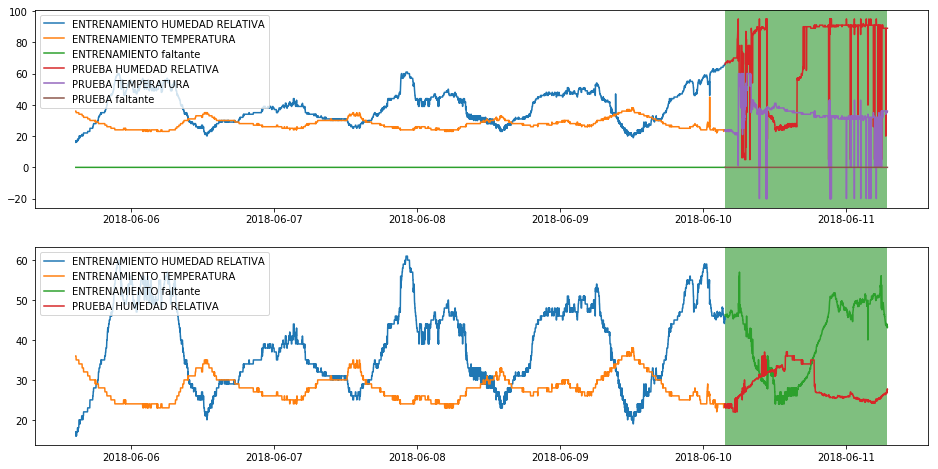

In [5]:
corte = int(len(xbase)*.8)
plt.figure(figsize=[16,8])
plt.subplot(211)
le =[]
le += plt.plot(xbase.iloc[0:corte,:])
le += plt.plot(xbase.iloc[corte:,:])
plt.axvspan(xbase.index[corte], xbase.index[-1], facecolor='g', alpha=0.5)

columnas = list(xbase.columns.values)
label=[]
for i in range(cts):
    label.append('ENTRENAMIENTO %s'%columnas[i])
for i in range(cts):
    label.append('PRUEBA %s'%columnas[i])

plt.legend(le[:6], label)

plt.subplot(212)
lp = []
lp += plt.plot(ybase.iloc[0:corte,:])
lp += plt.plot(ybase.iloc[corte:,:])
plt.axvspan(xbase.index[corte], xbase.index[-1], facecolor='g', alpha=0.5)
plt.legend(lp[:2], ybase.columns)
plt.legend(lp[:6], label)
columnas = list(ybase.columns.values)
label = []
for i in range(objetivos):
    label.append('ENTRENAMIENTO %s'%columnas[i])
for i in range(objetivos):
    label.append('PRUEBA %s'%columnas[i])

In [6]:
y = ybase.iloc[ventana:,:].values
display(x.shape,y.shape)

(8174, 18)

(8174, 2)

## Vamo a normalizar los datos

In [7]:
from sklearn import preprocessing
# scaler para x
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [8]:
# 5 columnas
x = np.array(x).reshape(len(x),ventana*cts)
x = scaler.fit_transform(x)

In [9]:
# scaler para y
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = y.reshape((len(y),objetivos))
y = scaler_y.fit_transform(y)
display(x.shape,y.shape)

(8174, 18)

(8174, 2)

# Train and Test Sets

Define la forma de entrada y salida de los datos, las variables usadas para predecir y la variable que se va a predecir

In [10]:
train_end = int(len(y)*.8)
x_train = x[0:train_end,]
x_test = x[train_end+1:len(y),]
y_train = y[0:train_end]
y_test = y[train_end+1:len(y)]

#Ajusta a la forma de entrada de la red
x_train=np.reshape(x_train,(x_train.shape[0],ventana,cts))
x_test=np.reshape(x_test,(x_test.shape[0],ventana,cts))

# Set de validación
y_valid = y_train [train_end-50:train_end]
x_valid = x_train [train_end-50:train_end]

print('Shape of x_train is ', x_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of x_test is ', x_test.shape)
print('Shape of y_test is ', y_test.shape)

Shape of x_train is  (6539, 6, 3)
Shape of y_train is  (6539, 2)
Shape of x_test is  (1634, 6, 3)
Shape of y_test is  (1634, 2)


In [11]:
# importa el modelo secuencial, permite apilar capas de manera lineal
from keras.models import Sequential
# importa la capa densa, esta es una capa de red neuronal completamente conectada regular
# con una función lineal de activación
from keras.layers import Dense, Activation
# Optimizador de descenso de gradiente estocástico
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
from keras . layers import Dropout

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Vamo a definir el modelo

In [12]:
# define una semilla para tener resultados repetibles
seed = 1161180
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(LSTM(units=8,activation='relu',
              recurrent_activation='hard_sigmoid',
              return_sequences=True,
              input_shape=(ventana,cts)))
fit1.add(Dropout(0.2))
fit1.add(LSTM(units=8))
# añade 5% drop out
fit1.add(Dropout(0.1))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(units=2, activation='linear'))

In [13]:
# Define el modelo secuencial
fit2 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit2.add(LSTM(units=8,activation='relu',
              recurrent_activation='hard_sigmoid',
              return_sequences=True,
              input_shape=(ventana,cts)))
fit2.add(LSTM(units=8))
#Agrega 5% de drop out
fit2.add(Dropout(0.1))
#Agrega una capa densa con una slida y activación lineal
fit2.add(Dense(units=2, activation='linear'))

In [14]:
print('Shapeofx_trainis',x_train.shape)
print('Shapeofx_testis',x_test.shape)

Shapeofx_trainis (6539, 6, 3)
Shapeofx_testis (1634, 6, 3)


## Entrena LSTM sin estado

In [15]:
fit1.compile(loss='mean_absolute_error', optimizer='adam')
#Ajustar el modelo
history1 = fit1.fit(x_train, y_train, batch_size = 1,epochs=10,
                    validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=1,
                                              verbose=0,mode='auto')],verbose=0)
#callbacks =[EarlyStopping(monitor ='val_loss',patience=100,

fit2.compile(loss='mean_absolute_error', optimizer='adam')
#Ajustar el modelo
history2 = fit2.fit(x_train, y_train, batch_size = 1, epochs=10, shuffle=True,
                    validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=1,
                                              verbose=0,mode='auto')],verbose=0)

In [16]:
fit3 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit3.add(LSTM(units=15,stateful=True,batch_input_shape=(1,ventana,cts),activation='relu',
              recurrent_activation ='hard_sigmoid'))
fit3.add(Dropout(0.2))
fit3.add(Dense(units=2,activation='linear'))
fit3.compile(loss='mean_absolute_error',optimizer='adam')

fit4 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit4.add(LSTM(units=15,stateful=True,batch_input_shape=(1,ventana,cts),activation='relu',
              recurrent_activation ='hard_sigmoid'))
#fit4.add(Dropout(0.1))
fit4.add(Dense(units=2,activation='linear'))
fit4.compile(loss='mean_absolute_error',optimizer='adam')

## Entrena LSTM con estado

In [17]:
end_point =len(x_train)
start_point =end_point - 50

#The model has to be trained one epoch at a time with the
#state reset after each epoch

history3=[]
for i in range(len(x_train[start_point:end_point])):
    history3.append(fit3.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,shuffle=False,validation_data=(x_valid,y_valid),
                             callbacks =[EarlyStopping(monitor ='val_loss',patience=1,
                                                       verbose=0,mode='auto')],verbose=0))
    fit3.reset_states()
    
history4=[]
for i in range(len(x_train[start_point:end_point])):
    history4.append(fit4.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,shuffle=True, validation_data=(x_valid,y_valid),
                             callbacks =[EarlyStopping(monitor ='val_loss',patience=1,
                                                       verbose=0,mode='auto')],verbose=0))
    fit4.reset_states()

In [18]:
from keras.layers.recurrent import GRU

fit5 = Sequential ()
#return_sequeinces=False para trabajar con una sola objetivo
#Para trabajar con varios objetivos se deja en True
fit5.add(GRU(units=8,return_sequences= False,activation='relu',
             recurrent_activation='hard_sigmoid',input_shape=(ventana,cts)))
fit5.add(Dropout(0.1))
fit5.add(Dense(units=objetivos,activation='linear'))
fit5.compile(loss='mean_absolute_error',optimizer='adam')

## Entrena GRU

In [19]:
history5 = fit5.fit(x_train,y_train,batch_size=1,epochs=10, validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=1,
                                              verbose=0,mode='auto')],verbose=0)

the
model will forecast the next month based on the last 500 rolling
months of data:

The larger the batch size, the more memory you
will need to run the model

In [20]:
display(fit1.summary())
display(fit2.summary())
display(fit3.summary())
display(fit4.summary())
display(fit5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 8)              384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 8)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 946
Trainable params: 946
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 8)              384       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 946
Trainable params: 946
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (1, 15)                   1140      
_________________________________________________________________
dropout_4 (Dropout)          (1, 15)                   0         
_________________________________________________________________
dense_3 (Dense)              (1, 2)                    32        
Total params: 1,172
Trainable params: 1,172
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (1, 15)                   1140      
_________________________________________________________________
dense_4 (Dense)              (1, 2)                    32        
Total params: 1,172
Trainable params: 1,172
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 8)                 288       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


None

# Evaluar el modelo
Train and Test MSE


In [21]:
for i in range(1,6):
    print('fit%d'%i)
    f = vars()[('fit%s')%str(i)]
    tr = vars()[('score_train%s')%str(i)] = f.evaluate(x_train, y_train, batch_size=1)
    ts = vars()[('score_test%s')%str(i)] = f.evaluate(x_test, y_test, batch_size=1)
    print('in train%d MAE = '%i, round(tr,4))
    print('in test%d MAE = '%i, round(ts,4),'\n')

fit1
1634/1634 [==============================] - 4s 2ms/step
in train1 MAE =  0.0602
in test1 MAE =  0.3037 

fit2
1634/1634 [==============================] - 3s 2ms/step
in train2 MAE =  0.0384
in test2 MAE =  0.327 

fit3
1634/1634 [==============================] - 2s 1ms/step
in train3 MAE =  0.2502
in test3 MAE =  0.2492 

fit4
1634/1634 [==============================] - 3s 2ms/step
in train4 MAE =  0.2523
in test4 MAE =  0.2642 

fit5
1634/1634 [==============================] - 2s 1ms/step
in train5 MAE =  0.0495
in test5 MAE =  0.356 



And to convert the predictions back to their original scale,
so we can view them individually:

In [22]:
from sklearn.metrics import mean_absolute_error

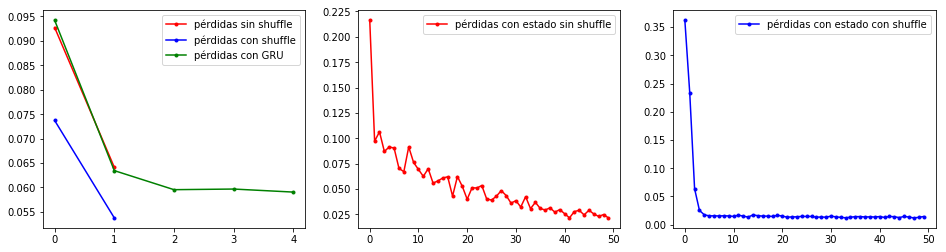

In [23]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
plt.plot(history1.history['loss'], 'r.-', label='pérdidas sin shuffle')
plt.plot(history2.history['loss'], 'b.-', label='pérdidas con shuffle')
plt.plot(history5.history['loss'], 'g.-', label='pérdidas con GRU')
plt.legend()

plt.subplot(1,3,2)
h3 = [x.history['loss'] for x in history3]
plt.plot(h3, 'r.-', label='pérdidas con estado sin shuffle')
plt.legend()

plt.subplot(1,3,3)
h4 = [x.history['loss'] for x in history4]
plt.plot(h4, 'b.-',label='pérdidas con estado con shuffle')
plt.legend()

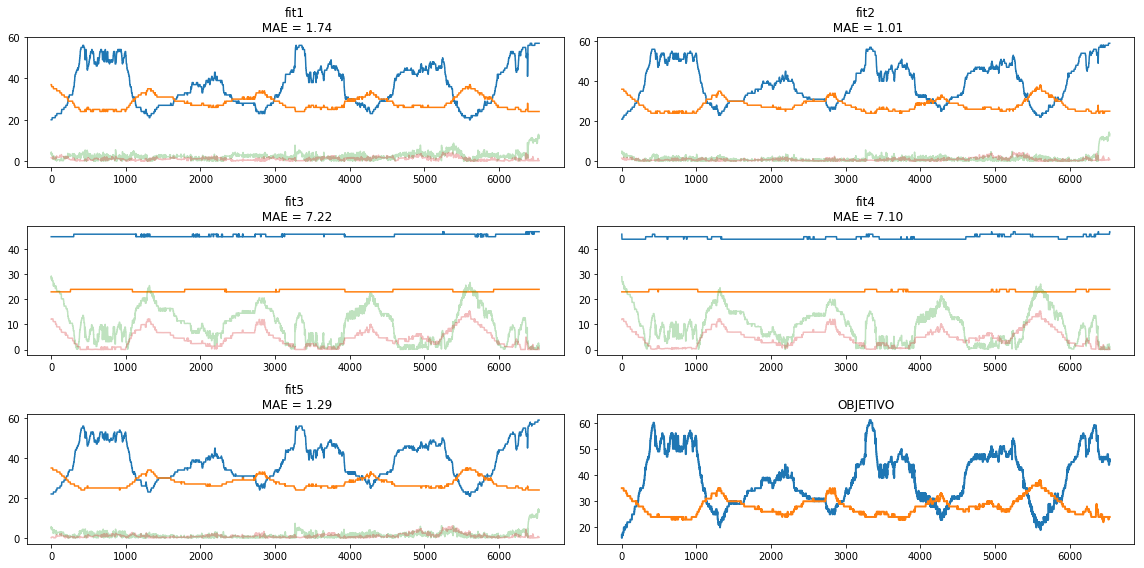

In [24]:
entrenamiento = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train),objetivos)))
plt.figure(figsize=[16,8])
plt.subplot(3,2,6)
plt.plot(np.rint(entrenamiento),label='set de prueba',linewidth=2)
plt.title('OBJETIVO')

for i in [1,2,5]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x_train)
    p = vars()[('e_pred%s')%str(i)] = scaler_y.\
    inverse_transform(np.array(p).reshape((len(p),objetivos)))
    p1 = mean_absolute_error(p, entrenamiento)
    plt.plot(np.rint(p))
    plt.plot(abs(p-entrenamiento),alpha=.3)
    plt.title('fit%d\n MAE = %.2f'%(i,p1))

for i in [3,4]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x_train,batch_size=1)
    p = vars()[('e_pred%s')%str(i)] = scaler_y.\
    inverse_transform(np.array(p).reshape((len(p),objetivos)))
    p1 = mean_absolute_error(p, entrenamiento)
    plt.plot(np.rint(p))
    plt.title('fit%d\n MAE = %.2f'%(i,p1))
    plt.plot(abs(p-entrenamiento),alpha=.3)
plt.tight_layout()

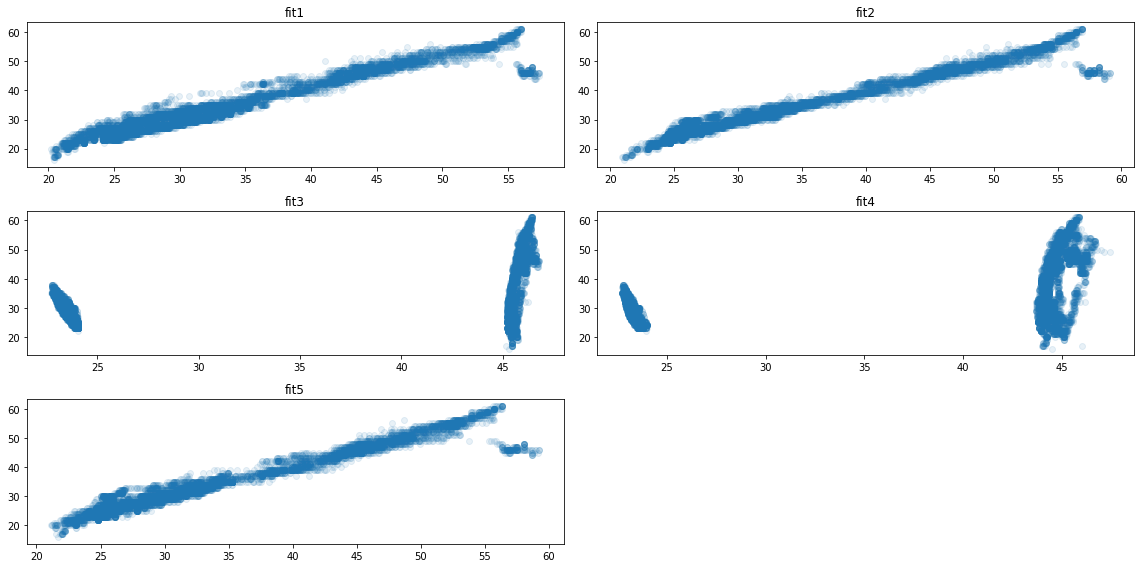

In [31]:
plt.figure(figsize=[16,8])
for i in range(1,6):
    plt.subplot(3,2,i)
    p = vars()[('e_pred%s')%str(i)]
    #plt.scatter(np.rint(p),np.rint(entrenamiento),alpha=.1)
    plt.scatter((p),np.rint(entrenamiento),alpha=.1)
    plt.title('fit%d'%i)
plt.tight_layout()

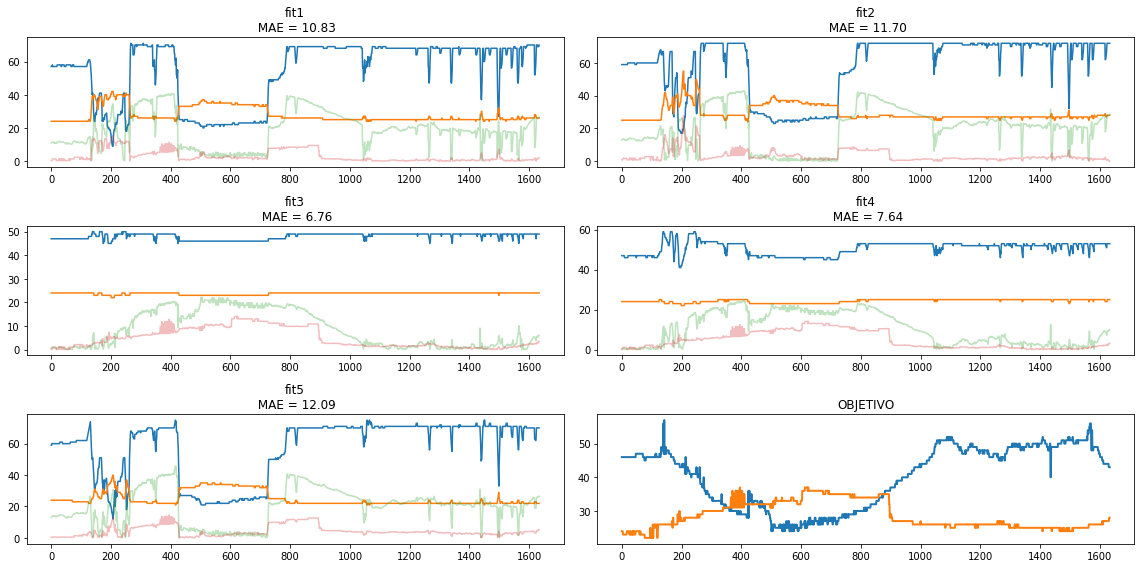

In [26]:
prueba = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),objetivos)))
plt.figure(figsize=[16,8])
plt.subplot(3,2,6)
plt.plot(np.rint(prueba),label='set de prueba',linewidth=2)
plt.title('OBJETIVO')

for i in [1,2,5]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x_test)
    p = vars()[('pred%s')%str(i)] = scaler_y.\
    inverse_transform(np.array(p).reshape((len(p),objetivos)))
    p1 = mean_absolute_error(p, prueba)
    plt.plot(np.rint(p))
    plt.plot(abs(p-prueba),alpha=.3)
    plt.title('fit%d\n MAE = %.2f'%(i,p1))

for i in [3,4]:
    plt.subplot(3,2,i)
    f = vars()[('fit%s')%str(i)]
    p = f.predict(x_test,batch_size=1)
    p = vars()[('pred%s')%str(i)] = scaler_y.\
    inverse_transform(np.array(p).reshape((len(p),objetivos)))
    p1 = mean_absolute_error(p, prueba)
    plt.plot(np.rint(p))
    plt.title('fit%d\n MAE = %.2f'%(i,p1))
    plt.plot(abs(p-prueba),alpha=.3)
plt.tight_layout()

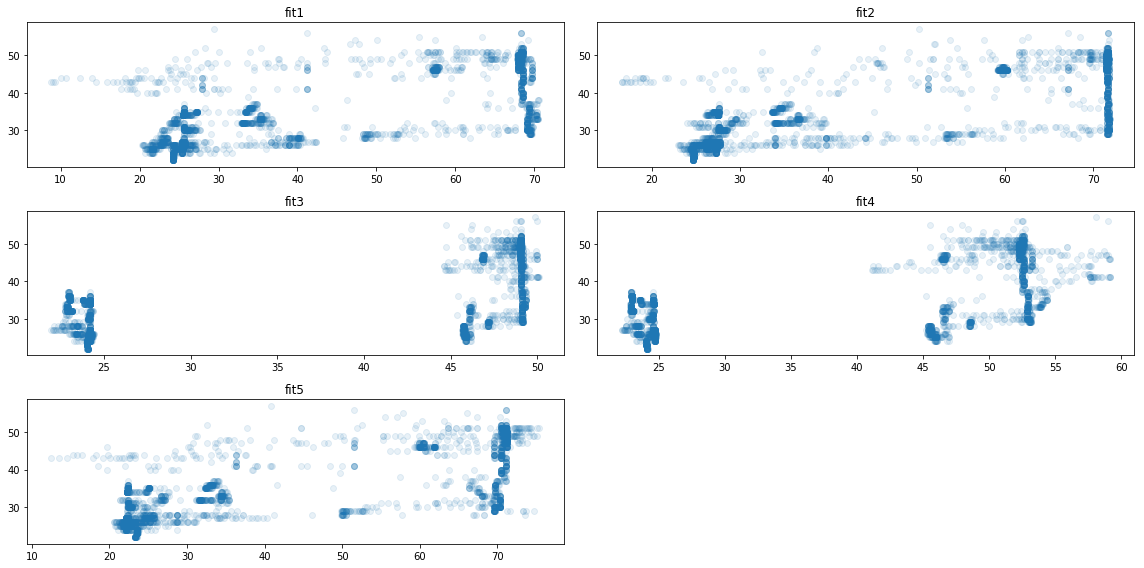

In [30]:
plt.figure(figsize=[16,8])
for i in range(1,6):
    plt.subplot(3,2,i)
    p = vars()[('pred%s')%str(i)]
    #plt.scatter(np.rint(p),np.rint(prueba),alpha=.1)
    plt.scatter((p),np.rint(prueba),alpha=.1)
    plt.title('fit%d'%i)
plt.tight_layout()

In [28]:
fit1.save('lstm.h5')
fit2.save('lstms.h5')
fit3.save('lstm_s.h5')
fit4.save('lstm_ss.h5')
fit5.save('grus.h5')
from sklearn.externals import joblib 
joblib.dump(scaler_y, 'scaler.save')

['scaler.save']

In [29]:
CAmbiamos todos los mse por mae :D
al cuarto le quitamos la capa Dropout

SyntaxError: invalid syntax (<ipython-input-29-fa83452732c1>, line 1)